<a href="https://colab.research.google.com/github/M-luthra07/deep-learning-ann-unit-1/blob/main/practical2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Test Loss: 0.0391, Test Accuracy: 1.0000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step

Confusion Matrix:
[[2 0]
 [0 4]]
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000


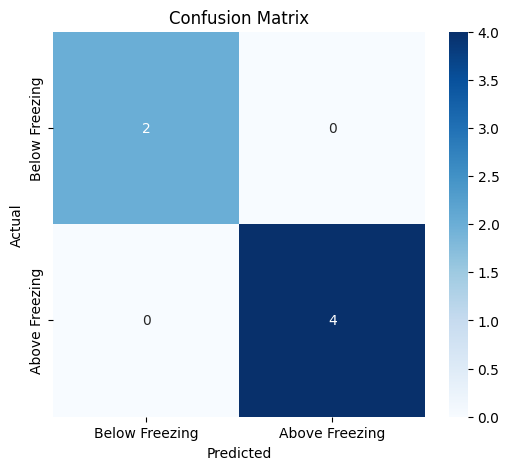

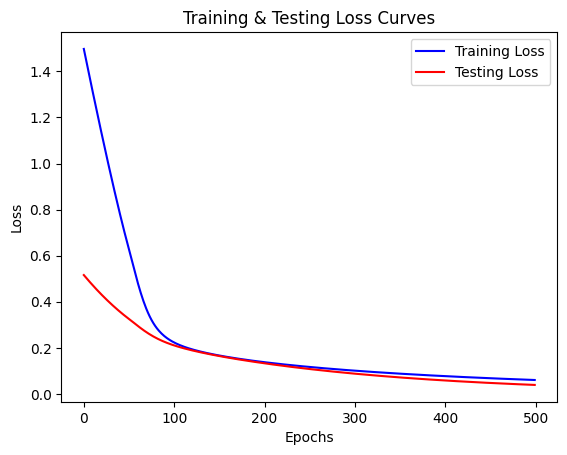

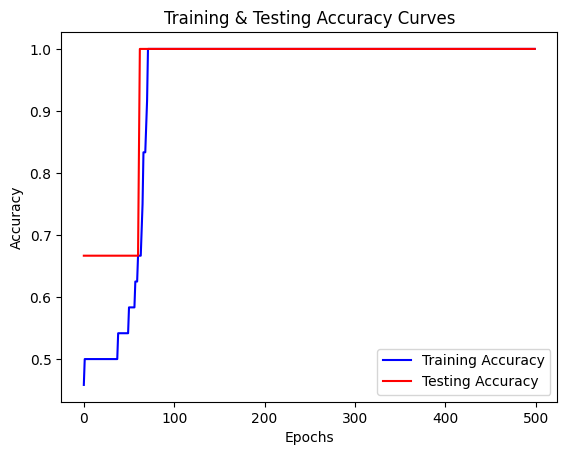

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
-40.0°C -> 0.0000 (Predicted: Below Freezing)
0.0°C -> 0.6713 (Predicted: Above Freezing)
100.0°C -> 1.0000 (Predicted: Above Freezing)


In [13]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

# Load dataset
Temperature_df = pd.read_csv('https://raw.githubusercontent.com/M-luthra07/deep-learning/main/02_Celsius%20to%20Fahrenheit-1.csv')

# Extract input and output variables
celsius = Temperature_df['Celsius'].values
fahrenheit = Temperature_df['Fahrenheit'].values

# Convert to binary classification (Above or Below Freezing Point)
threshold = 32  # Freezing point in Fahrenheit
y_class = (fahrenheit >= threshold).astype(int)  # 1 for Above Freezing, 0 for Below Freezing

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(celsius, y_class, test_size=0.2, random_state=42)

# Build the ANN model
model = keras.Sequential([
    keras.layers.Dense(units=10, input_shape=[1], activation='relu'),
    keras.layers.Dense(units=1, activation='sigmoid')  # Sigmoid for binary classification
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=500, verbose=0, validation_data=(X_test, y_test))

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}")

# Predict class labels
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob >= 0.5).astype(int)  # Convert probabilities to binary labels

# Compute Classification Metrics
conf_matrix = confusion_matrix(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("\nConfusion Matrix:")
print(conf_matrix)
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")

# Plot Confusion Matrix
plt.figure(figsize=(6,5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Below Freezing", "Above Freezing"], yticklabels=["Below Freezing", "Above Freezing"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Plot training and testing loss curves
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history['val_loss'], label='Testing Loss', color='red')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training & Testing Loss Curves')
plt.legend()
plt.show()

# Plot training and testing accuracy curves
plt.plot(history.history['accuracy'], label='Training Accuracy', color='blue')
plt.plot(history.history['val_accuracy'], label='Testing Accuracy', color='red')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training & Testing Accuracy Curves')
plt.legend()
plt.show()

# Make predictions on some test values
celsius_test_values = np.array([-40, 0, 100], dtype=float)
predicted_probabilities = model.predict(celsius_test_values)
predicted_classes = (predicted_probabilities >= 0.5).astype(int)

# Display predictions
for c, p, cls in zip(celsius_test_values, predicted_probabilities, predicted_classes):
    category = "Above Freezing" if cls == 1 else "Below Freezing"
    print(f"{c}°C -> {p[0]:.4f} (Predicted: {category})")



In [12]:
def predict_temperature(celsius_value):
    # Convert celsius_value to a NumPy array with the correct shape
    celsius_value = np.array([[celsius_value]])
    fahrenheit_pred = model.predict(celsius_value)[0][0]  # Get predicted value
    category = "Hot" if fahrenheit_pred >= threshold else "Cold"
    print(f"\nPredicted Temperature: {fahrenheit_pred:.2f}°F ({category})")
    return fahrenheit_pred, category

# Example Prediction
celsius_input = float(input("Enter Celsius temperature for prediction: "))
predict_temperature(celsius_input)

Enter Celsius temperature for prediction: 0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step

Predicted Temperature: 0.05°F (Cold)


(0.049983792, 'Cold')